Johannes's Simple NN.

Two Weights, w and b

Problem: Obese by weight

<img width=300 height=300 src=".\NN-Architecture.jpg"/>

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(1)
np.random.seed(1)

w = random.random()
w2 = random.random()
b = random.random()

print(f"weight1: {w}")
print(f"weight2: {w2}")
print(f"bias: {b}")


def sig(x):
 return 1/(1 + np.exp(-x))

def forward(x:tuple[int, int, int]): # odds they are obese
    z = x[0]*w + x[1]*w2 + b
    a = sig(z)
    return a

def loss(x, y):
    return np.square(y-x)

def derive(x, y, weight): # calculating the derivative of the loss function with respect to some weight
  return float((loss((weight + 0.0000000001)*x, y) - loss(weight*x, y))/0.0000000001)

training_data = [
    (165, 75, 0),  # Not Obese
    (172, 95, 1),  # Obese
    (160, 80, 1),  # Obese
    (178, 68, 0),  # Not Obese
    (150, 90, 1),  # Obese
    (185, 85, 0),  # Not Obese
    (170, 70, 0),  # Not Obese
    (155, 60, 0),  # Not Obese
    (175, 100, 1), # Obese
    (165, 85, 1),  # Obese
]

weight1: 0.13436424411240122
weight2: 0.8474337369372327
bias: 0.763774618976614


In [70]:
loss_list = [loss(forward(x), x[2]) for x in training_data]
i = 0
while np.average(loss_list) > 0:
    derivative_one = [derive(x[0], x[2], w) for x in training_data]
    derivative_two = [derive(x[1], x[2], w2) for x in training_data]
    derivative_bias = [derive(x[2], x[2], b) for x in training_data]
    avg_one = np.average(derivative_one)
    avg_two = np.average(derivative_two)
    avg_bias = np.average(derivative_bias)
    sign_one = 0 if np.average(derivative_one) == 0 else -1 * np.average(derivative_one) * np.abs((1/np.average(derivative_one)))
    sign_two = 0 if np.average(derivative_two) == 0 else -1 * np.average(derivative_two) * np.abs((1/np.average(derivative_two)))
    sign_bias = 0 if np.average(derivative_bias) == 0 else -1 * np.average(derivative_bias) * np.abs((1/np.average(derivative_bias)))

    # Change each weight/bias
    w += sign_one*0.000001*np.abs(avg_one)
    w2 += sign_two*0.000001*np.abs(avg_two)
    b += sign_bias*0.000001*np.abs(avg_bias)

    loss_list = [loss(forward(x), x[2]) for x in training_data]
    print(f"Average Loss: {np.average(loss_list)}")
    print(f"Average derivative one: {avg_one}")
    print(f"Average derivative two: {avg_two}")
    print(f"Average derivative bias: {avg_bias}")
    # print(f"Average loss: {np.average(loss_list)}")
    i += 1
    if i >= 1000:
        break

Average Loss: 0.5
Average derivative one: 7402.806886602775
Average derivative two: 11218.83315136074
Average derivative bias: -0.23622537953515987
Average Loss: 0.5
Average derivative one: 6985.8909910180955
Average derivative two: 11069.119409512496
Average derivative bias: -0.23622517136834276
Average Loss: 0.5
Average derivative one: 6592.454553810967
Average derivative two: 10921.403372776695
Average derivative bias: -0.23622492850705612
Average Loss: 0.5
Average derivative one: 6221.176931830996
Average derivative two: 10775.660030049039
Average derivative bias: -0.23622468564576948
Average Loss: 0.5
Average derivative one: 5870.8088204184605
Average derivative two: 10631.861641741125
Average derivative bias: -0.23622444278448285
Average Loss: 0.5
Average derivative one: 5540.173191320719
Average derivative two: 10489.98137775925
Average derivative bias: -0.2362241999231962
Average Loss: 0.5
Average derivative one: 5228.15835779511
Average derivative two: 10349.995591241168
Avera

In [64]:
print(w)
print(w2)
print(b)

0.0029191066010681686
0.006744199923570877
0.7886985499706837


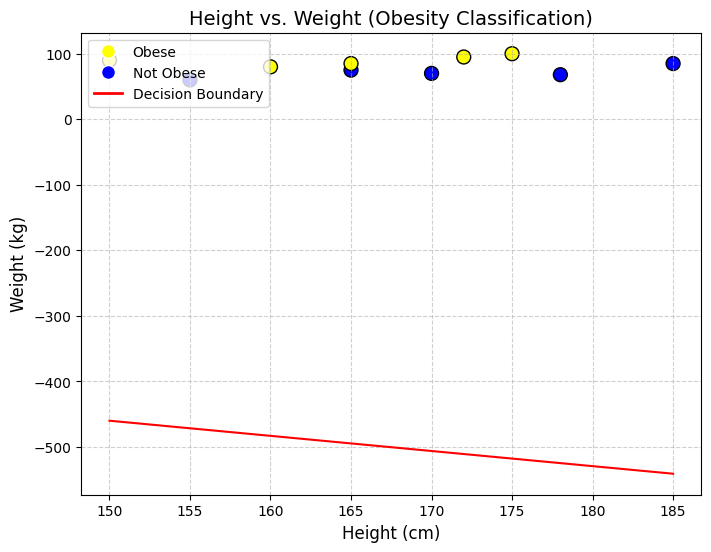

In [72]:
# Calculate the slope and intercept
slope = -w2 / w
intercept = -b / w2

# Generate x-values for the line
x_values = np.linspace(min(heights), max(heights), 100)

# Calculate the corresponding y-values using the line equation
y_values = slope * x_values + intercept

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(heights, weights, c=colors, edgecolor='black', s=100)

# Plot the line
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

# Add labels and title
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.title('Height vs. Weight (Obesity Classification)', fontsize=14)

# Add a legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Obese', markerfacecolor='yellow', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Not Obese', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], color='red', lw=2, label='Decision Boundary')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

# Show plot
plt.grid(True, linestyle='--', alpha=.6)
plt.show()
